# Task: Prediction using Decision Tree Algorithm

### Author: Hassan Ikram

 ## Objective: 
 Classify the Iris leaf species using decision tree classifier and visualize it graphically.
 The data is download from  https://bit.ly/3kXTdox

In [246]:
# Importing  Libraries
import sklearn
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [247]:
data = pd.read_csv("Iris.csv")

In [248]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [249]:
## CHecking the non-null column in the data and the data type of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [250]:
## Checking the unique values of species in the dataset 
data["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

## Data Visualization

Text(0.5, 1.0, 'Scatter plot on Iris dataset')

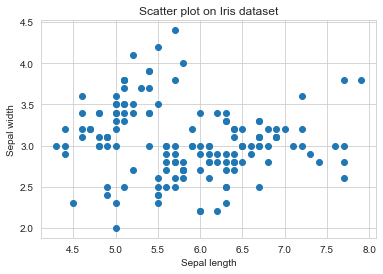

In [251]:
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Scatter plot on Iris dataset')

Text(0.5, 1.0, 'Scatter plot on Iris dataset')

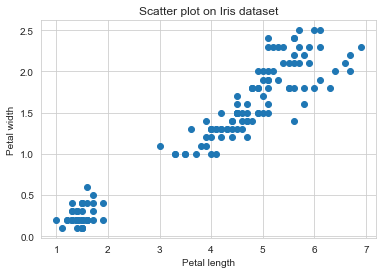

In [252]:
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'])
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Scatter plot on Iris dataset')

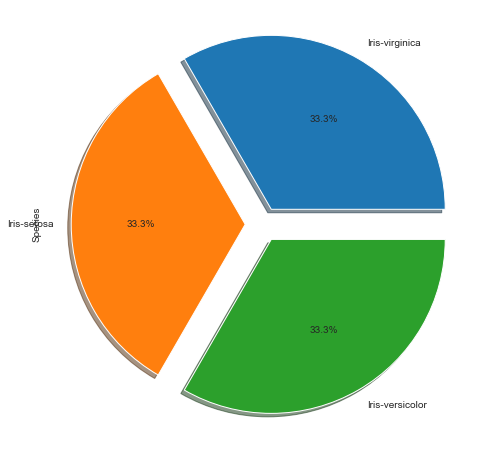

In [253]:
data["Species"].value_counts().plot.pie(explode=(0.1,0.1,0.1), autopct="%1.1f%%", shadow=True,figsize=(8,8))
plt.show()

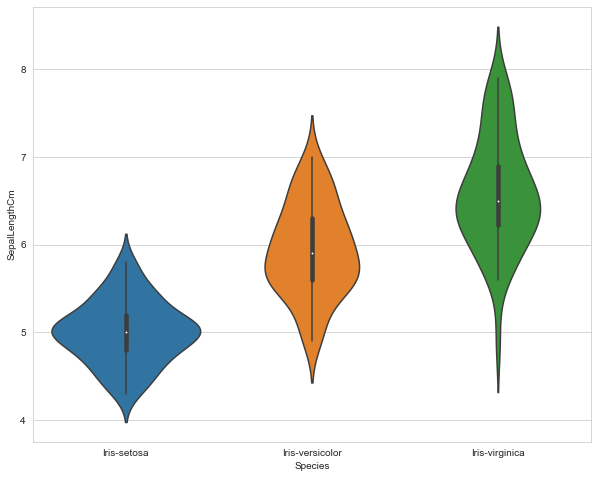

In [254]:
fig = plt.gcf()
fig.set_size_inches(10,8)
fig = sns.violinplot(x="Species", y="SepalLengthCm", data=data)

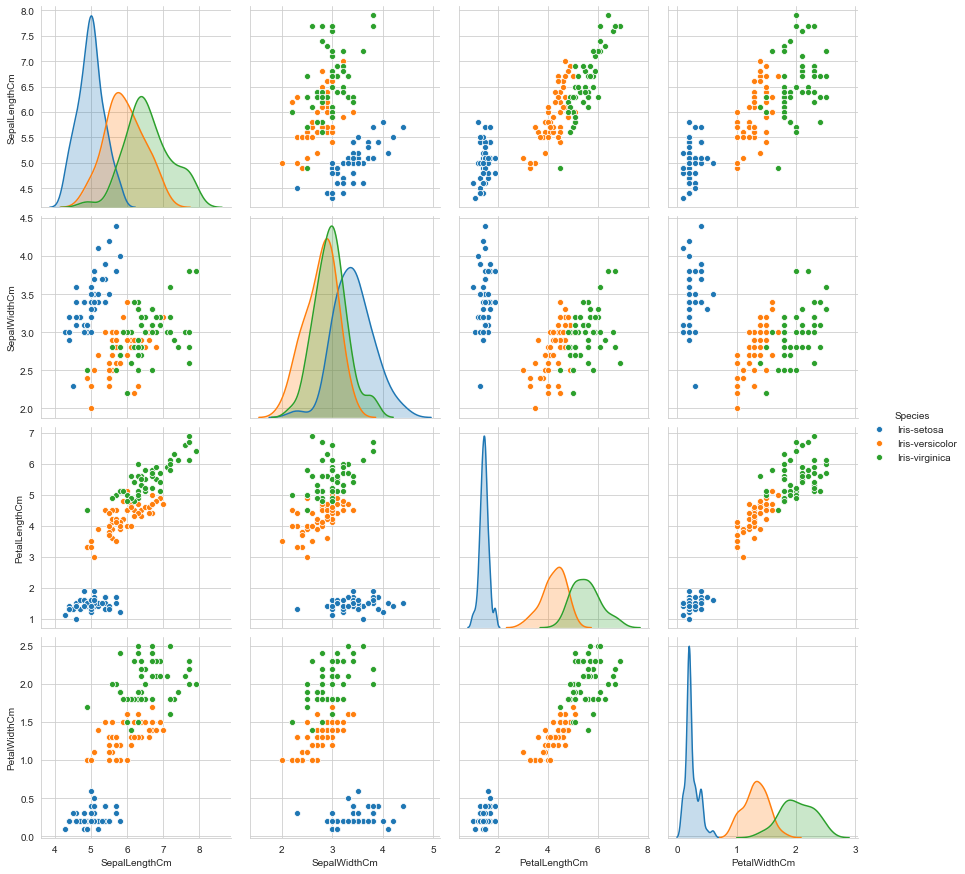

In [255]:
## Creating paiplots to visualize the features relationship with dependent variable
sns.set_style("whitegrid");
sns.pairplot(data.drop("Id", axis=1), hue="Species", height=3);
plt.show()

## Encoding Species Column

In [256]:
encoder = LabelEncoder()
encoder.fit(data.Species)

LabelEncoder()

In [257]:
data["Target"] = encoder.transform(data.Species)

In [258]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2
149,150,5.9,3.0,5.1,1.8,Iris-virginica,2


## Splitting the data into train and test sets

In [259]:
X = data.drop(["Species", "Id", "Target"], axis=1)
y = data["Target"]


In [260]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=10)


In [261]:
X_train.shape,y_train.shape 

((127, 4), (127,))

## Training on Tree Classifier

In [262]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

In [263]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [264]:
## Predicting on the test set

In [265]:
predictions = classifier.predict(X_test)

In [266]:
## Checking the Score of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9565217391304348

In [267]:
## Creating a confusion matrix
from sklearn.metrics import confusion_matrix
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

[[8 0 0]
 [0 8 1]
 [0 0 6]]


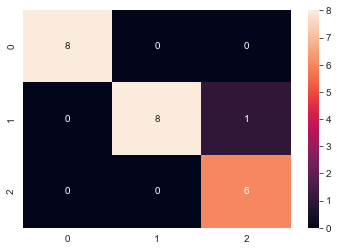

In [268]:
sns.heatmap(cf_matrix, annot=True)

In [269]:
# Creating a dataframe to check how many values are predicted correctly
check_accuracy = pd.DataFrame({"Real Species": y_test, "Predicted Species": predictions})
check_accuracy

,Real Species,Predicted Species
87,1,1
111,2,2
10,0,0
91,1,1
49,0,0
60,1,1
72,1,2
67,1,1
39,0,0
55,1,1


## Visualizing the Decision Tree Classifier

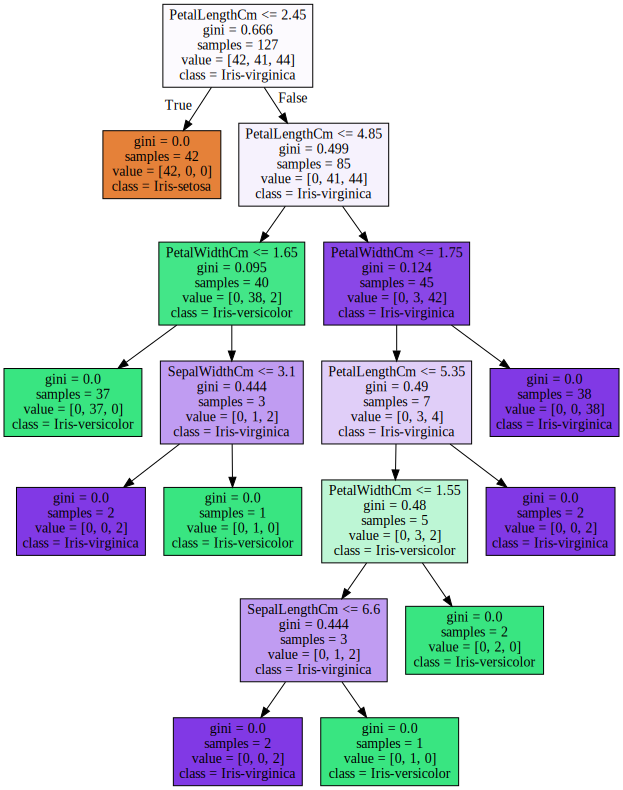

In [270]:
import graphviz
# DOT data
dot_data = sklearn.tree.export_graphviz(classifier, out_file=None, 
                                feature_names=X.columns,  
                                class_names=list(encoder.classes_),
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


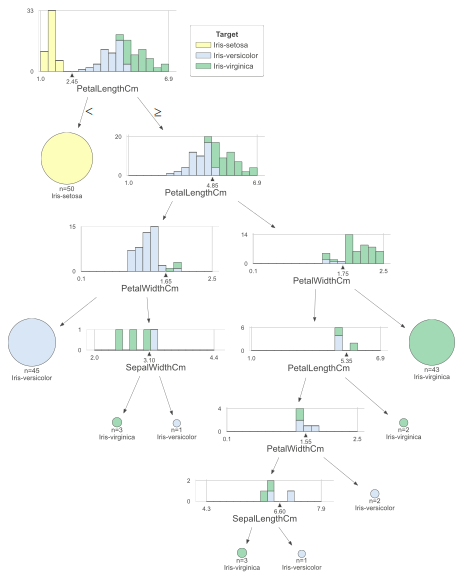

In [271]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(classifier, X, y,
               target_name="Target",
               feature_names = X.columns,
               class_names = list(encoder.classes_),
              )

viz


We can now feed new data into the classifier, and it can predict right class accordingly.

## END